In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import pickle
from lesson_functions import *
%matplotlib inline

/home/titee/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/home/titee/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


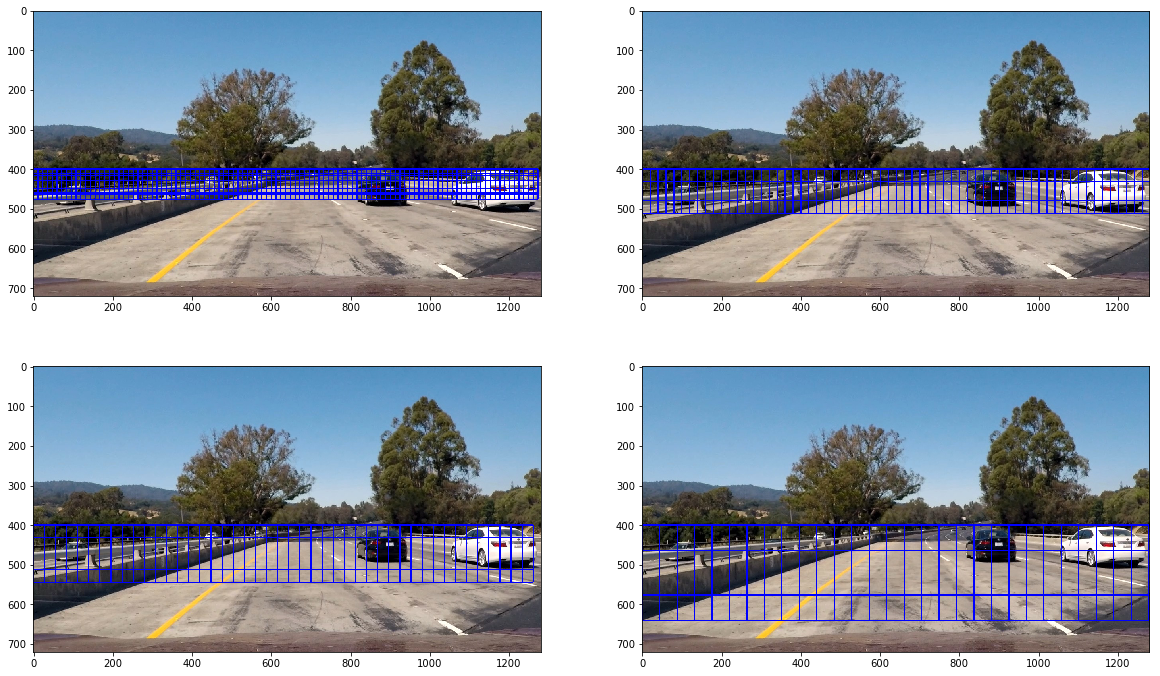

In [2]:
# load model
filename = 'finalized_svc.sav'
loaded = pickle.load(open(filename, 'rb'))

# set model and hog parameters
svc = loaded['svc']
X_scaler = loaded['X_scaler']
color_space = loaded['color_space']
spatial_size = loaded['spatial_size']
hist_bins = loaded['hist_bins'] 
orient = loaded['orient'] 
pix_per_cell = loaded['pix_per_cell']
cell_per_block = loaded['cell_per_block']
hog_channel = loaded['hog_channel']
spatial_feat = loaded['spatial_feat']
hist_feat = loaded['hist_feat'] 
hog_feat = loaded['hog_feat']
                
images = ['./test_images/test1.jpg','./test_images/test2.jpg','./test_images/test3.jpg','./test_images/test4.jpg','./test_images/test5.jpg','./test_images/test6.jpg']
image = image = mpimg.imread(images[0])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
# see slide windows
ystart = 400
ystop = 464
scale = 0.75
car_window = find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel, all_windows=True)

ystart = 416
ystop = 480
car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel, all_windows=True)

axes[0][0].imshow(draw_boxes(image, car_window, thick=2), cmap='gray')

ystart = 400
ystop = 496
scale = 1.25
car_window = find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel, all_windows=True)

ystart = 432
ystop = 528
car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel, all_windows=True)

axes[0][1].imshow(draw_boxes(image, car_window, thick=2), cmap='gray')

ystart = 400
ystop = 528
scale = 1.75
car_window = find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel, all_windows=True)

ystart = 432
ystop = 560
car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel, all_windows=True)

axes[1][0].imshow(draw_boxes(image, car_window, thick=2), cmap='gray')

ystart = 400
ystop = 596
scale = 2.75
car_window = find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel, all_windows=True)

ystart = 464
ystop = 660
car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel, all_windows=True)
    
axes[1][1].imshow(draw_boxes(image, car_window, thick=2), cmap='gray')


/home/titee/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


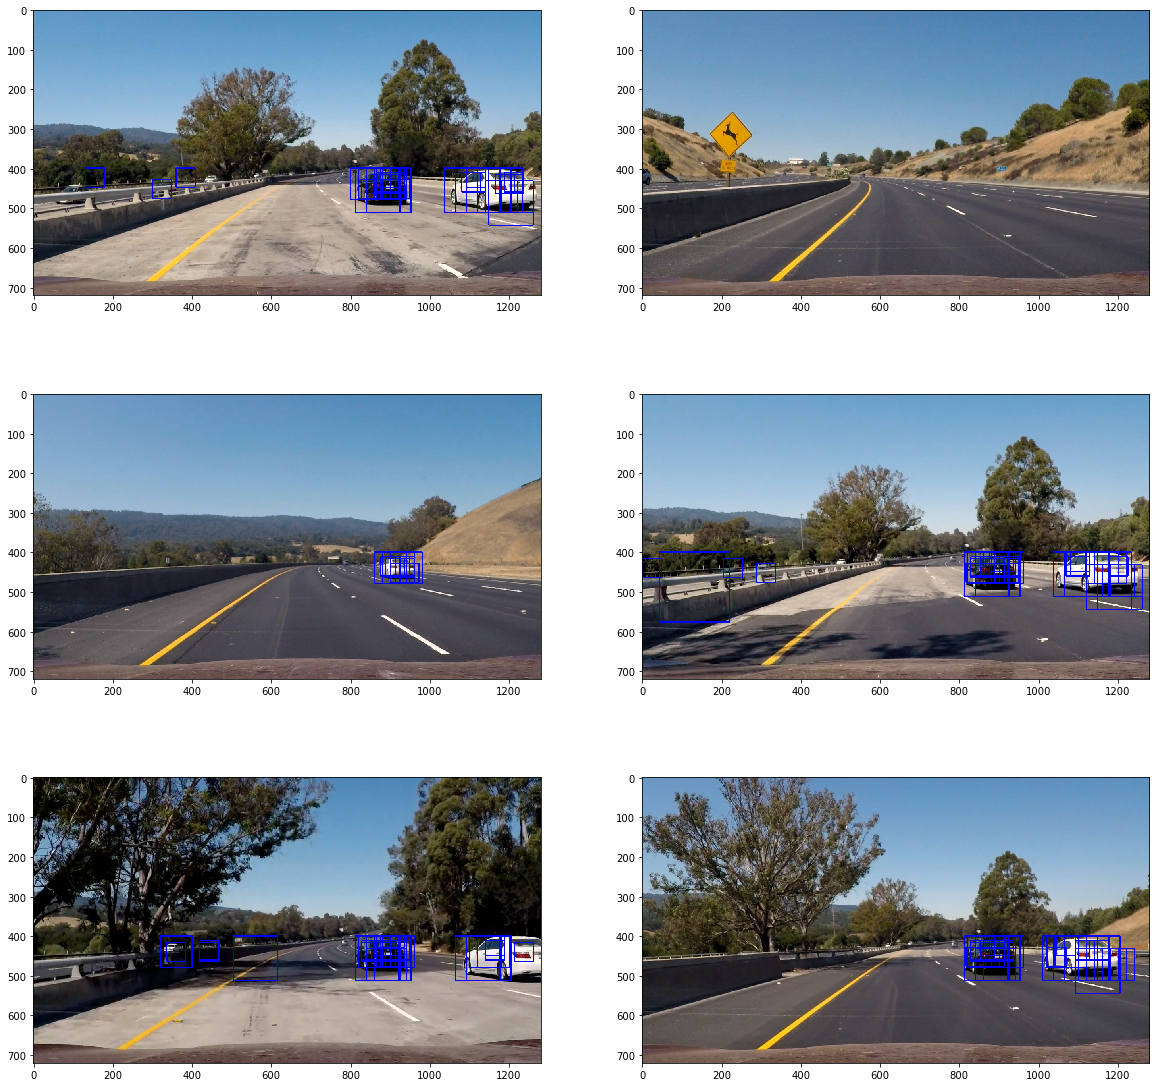

In [3]:
# load model
filename = 'finalized_svc.sav'
loaded = pickle.load(open(filename, 'rb'))

# set model and hog parameters
svc = loaded['svc']
X_scaler = loaded['X_scaler']
color_space = loaded['color_space']
spatial_size = loaded['spatial_size']
hist_bins = loaded['hist_bins'] 
orient = loaded['orient'] 
pix_per_cell = loaded['pix_per_cell']
cell_per_block = loaded['cell_per_block']
hog_channel = loaded['hog_channel']
spatial_feat = loaded['spatial_feat']
hist_feat = loaded['hist_feat'] 
hog_feat = loaded['hog_feat']
                
def get_car_window(image, color_space, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel) :
    
    car_window = []
    ystart = 400
    ystop = 464
    scale = 0.75
    car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)

    ystart = 416
    ystop = 480
    car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)

    ystart = 400
    ystop = 496
    scale = 1.25
    car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)

    ystart = 432
    ystop = 528
    car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)

    ystart = 400
    ystop = 528
    scale = 1.75
    car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)

    ystart = 432
    ystop = 560
    car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)

    ystart = 400
    ystop = 596
    scale = 2.75
    car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)

    ystart = 464
    ystop = 660
    car_window += find_cars(image, ystart, ystop, color_space, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)
    
    return car_window

images = ['./test_images/test1.jpg','./test_images/test2.jpg','./test_images/test3.jpg','./test_images/test4.jpg','./test_images/test5.jpg','./test_images/test6.jpg']
car_windows = []
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
    
for i in range(len(images)) :
    image = mpimg.imread(images[i])
    
    car_window = get_car_window(image, color_space, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)
    car_windows.append(car_window)
    
    axes[int(i/2)][(i%2)].imshow(draw_boxes(image, car_window, thick=2), cmap='gray')


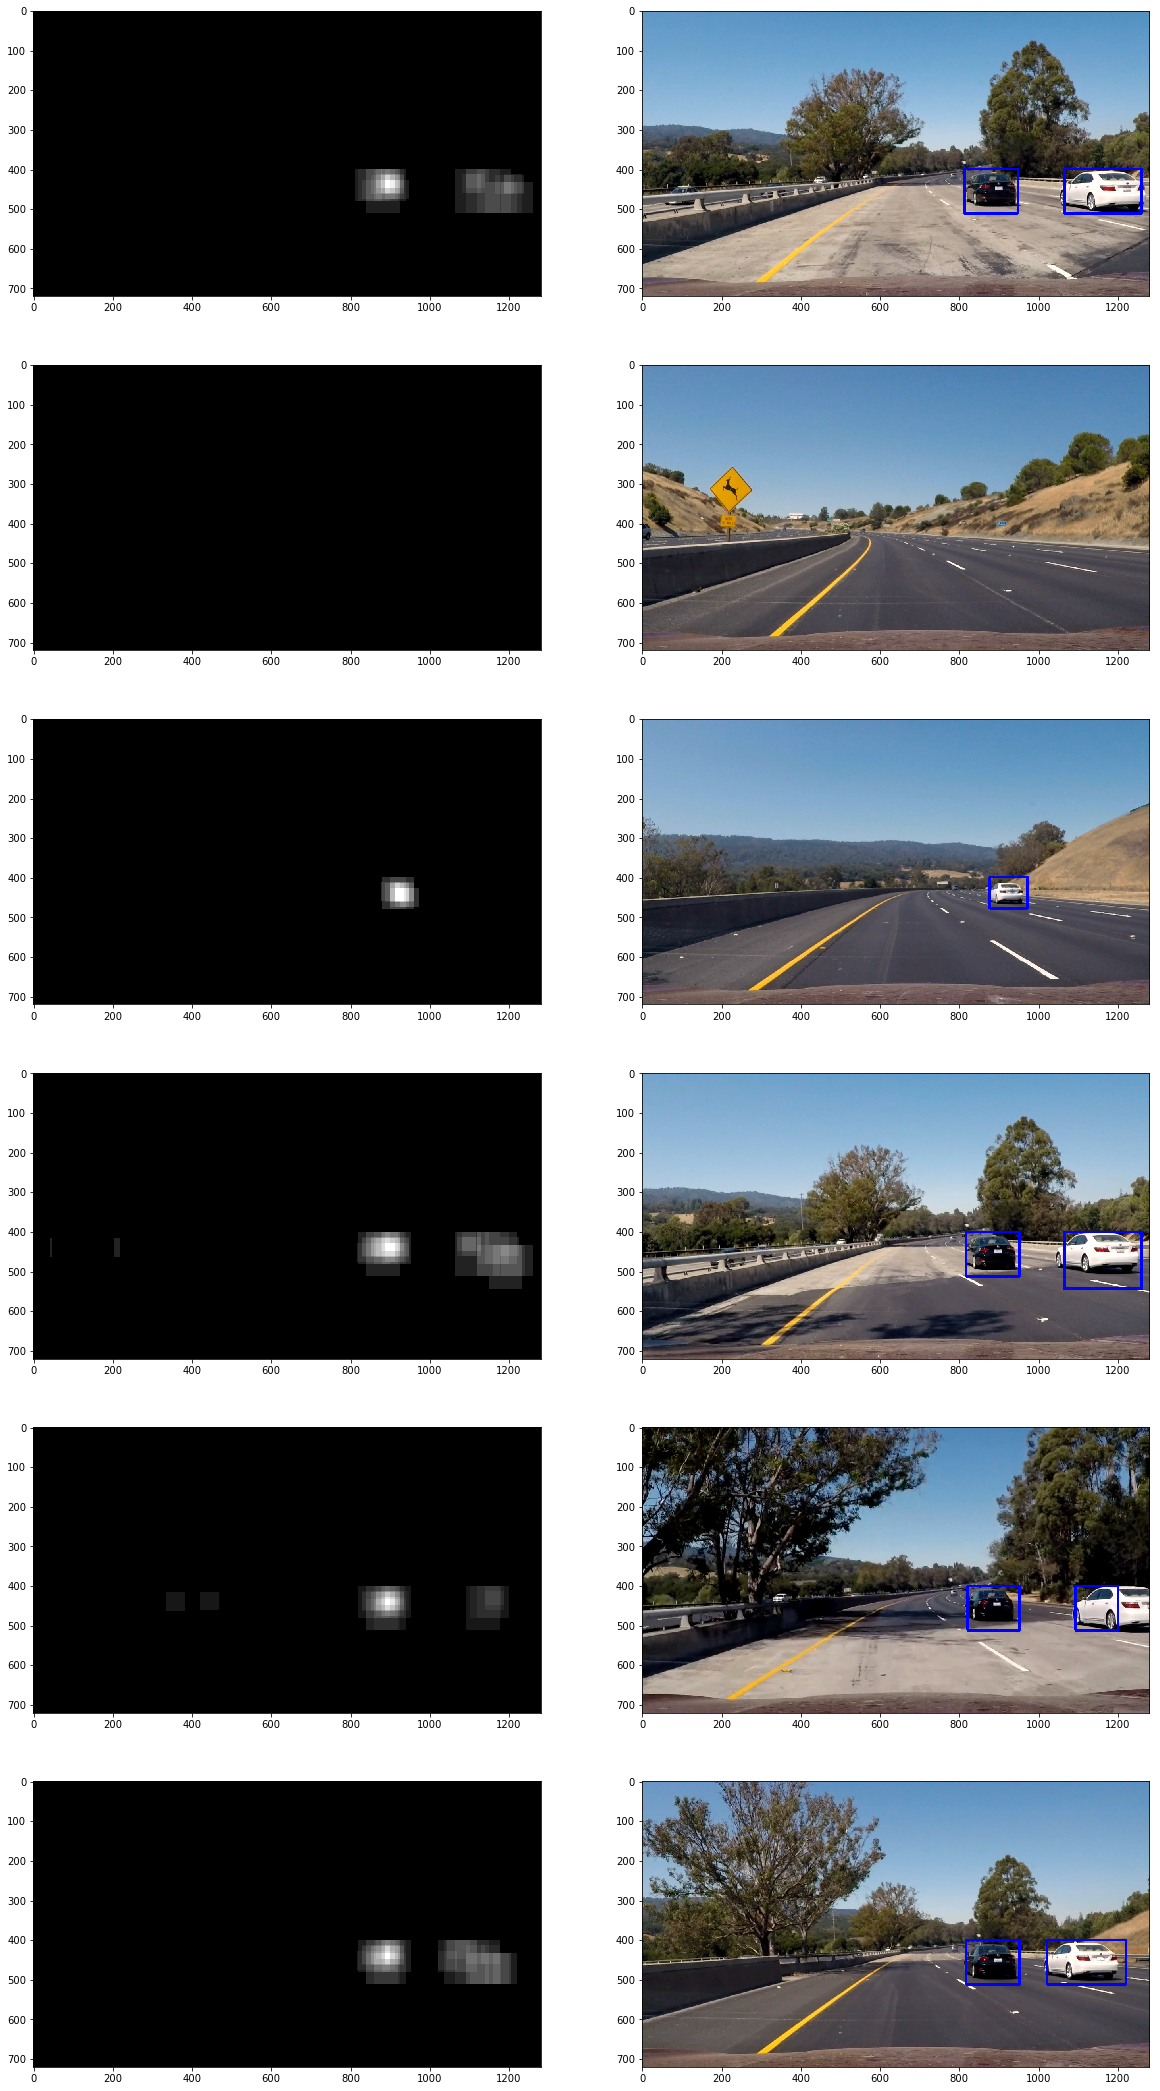

In [4]:
from scipy.ndimage.measurements import label

# Read in image similar to one shown above 
heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        if (bbox[1][0] - bbox[0][0] > 50) and (bbox[1][1] - bbox[0][1] > 50) :
            cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img


fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 38))
for i in range(len(images)) :
    
    image = mpimg.imread(images[i])
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    # Add heat to each box in box list
    heat = add_heat(heat,car_windows[i])

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    axes[i][0].imshow(heatmap, cmap='gray')
    axes[i][1].imshow(draw_img, cmap='gray')
    

In [5]:
# set pipline for each image
def pipeline(image) :
    car_window = get_car_window(image, color_space, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_feat, hist_feat, spatial_size, hist_bins, hog_channel)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heat = add_heat(heat,car_window)
    heat = apply_threshold(heat,1)
    heatmap = np.clip(heat, 0, 255)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img

In [6]:
from moviepy.editor import VideoFileClip

def videoPipeline(inputPath, outputPath):
    
    video = VideoFileClip(inputPath)
    clip = video.fl_image(pipeline)
    clip.write_videofile(outputPath, audio=False)
        
        
videoPipeline('project_video.mp4', 'project_video_output.mp4')

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [18:13<00:01,  1.01s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

